# Implementing Feed-forward neural networks with Keras and TensorFlow


1.   Import the necessary packages
2.   Load the training and testing data (MNIST/CIFAR10)
3.   Define the network architecture using Keras
4.   Train the model using SGD
5.   Evaluate the network
6.   Plot the training loss and accuracy

In [ ]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9
   19  29 216 254 254 167   9   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  53 197
  220 220 253 253 253 253 163   9   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62 100 148 236 253
  253 253 232 154 154 154 228 125   0   0]
 [  0   0   0   0   0   0   0   0   0  31 243 243 243 250 253 253 254 248
  231 222  47   0   0   0   8   6   0   0]
 [  0   0   0   0   0   0   0   0   0 157 253 253 253 253 236 15

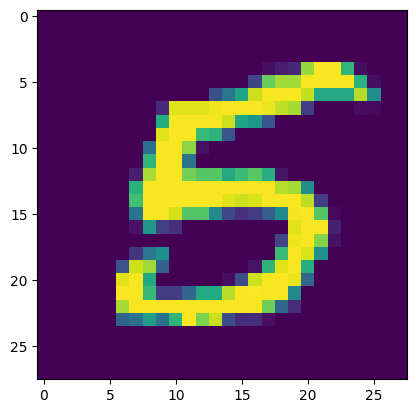

In [ ]:
IMGNO = 20000
print(x_train[IMGNO])
plt.imshow(x_train[IMGNO]);
print("The label for image number", IMGNO, "is", y_train[IMGNO])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
x_train = x_train.reshape((x_train.shape[0], 28 * 28 * 1))
x_test = x_test.reshape((x_test.shape[0], 28 * 28 * 1))
x_train = x_train.astype("float") / 255.0
x_test = x_test.astype("float") / 255.0
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
	epochs=100, batch_size=128)
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

Epoch 1/100
469/469 [==============================] - 11s 6ms/step - loss: 1.7883 - accuracy: 0.6026 - val_loss: 1.3371 - val_accuracy: 0.7706
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 1.0828 - accuracy: 0.8078 - val_loss: 0.8585 - val_accuracy: 0.8428
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7506 - accuracy: 0.8548 - val_loss: 0.6353 - val_accuracy: 0.8737
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.5826 - accuracy: 0.8794 - val_loss: 0.5126 - val_accuracy: 0.8880
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.4835 - accuracy: 0.8923 - val_loss: 0.4378 - val_accuracy: 0.9002
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.4203 - accuracy: 0.9024 - val_loss: 0.3875 - val_accuracy: 0.9060
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3765 - accuracy: 0.9082 - val_loss: 0.3546 - val_accuracy: 0.909

In [ ]:
from tensorflow.keras.datasets import cifar10
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
print(trainX.shape)
print(testX.shape)

[INFO] loading CIFAR-10 data...
170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


[[[ 26  23  32]
  [ 17  14  25]
  [ 13   9  24]
  ...
  [ 15  14  28]
  [ 24  24  37]
  [ 22  21  34]]

 [[ 20  17  26]
  [ 13  10  22]
  [ 13   9  24]
  ...
  [ 19  17  35]
  [ 21  20  35]
  [ 29  29  39]]

 [[ 14  11  20]
  [ 13  10  21]
  [ 13   9  23]
  ...
  [ 17  16  32]
  [ 25  24  38]
  [ 31  31  42]]

 ...

 [[ 90 109 137]
  [ 34  64  95]
  [ 28  54  90]
  ...
  [ 23  20  37]
  [ 16  13  30]
  [  9   6  23]]

 [[ 79 105 141]
  [ 58  96 139]
  [ 32  68 110]
  ...
  [ 14  11  28]
  [ 16  13  30]
  [ 10   7  24]]

 [[128 157 196]
  [ 58  93 149]
  [ 25  60 106]
  ...
  [ 13  10  27]
  [ 12   9  26]
  [ 13  10  27]]]
The label for image number 20000 is [8]


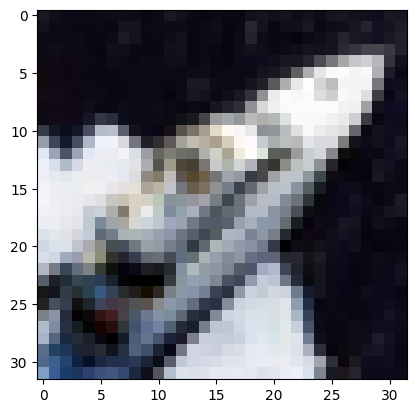

In [ ]:
IMGNO = 20000
print(trainX[IMGNO])
plt.imshow(trainX[IMGNO]);
print("The label for image number", IMGNO, "is", trainY[IMGNO])

In [ ]:
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainY[0])
print(trainX[0])
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

[0 0 0 0 0 0 1 0 0 0]
[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8379 - accuracy: 0.3437 - val_loss: 1.7060 - val_accuracy: 0.4024
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6526 - accuracy: 0.4158 - val_loss: 1.6143 - val_accuracy: 0.4370
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5740 - accuracy: 0.4420 - val_loss: 1.5975 - val_accuracy: 0.4327
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5137 - accuracy: 0.4652 - val_loss: 1.5208 - val_accuracy: 0.4663
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4671 - accuracy: 0.4812 - val_loss: 1.4943 - val_accuracy: 0.4689
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4249 - accuracy: 0.4965 - val_loss: 1.4598 - val_accuracy: 0.4872
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3892 - accuracy: 0.5106 

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.64      0.62      0.63      1000
  automobile       0.66      0.67      0.67      1000
        bird       0.43      0.52      0.47      1000
         cat       0.37      0.42      0.39      1000
        deer       0.50      0.46      0.48      1000
         dog       0.49      0.41      0.45      1000
        frog       0.68      0.58      0.63      1000
       horse       0.60      0.65      0.62      1000
        ship       0.70      0.68      0.69      1000
       truck       0.61      0.60      0.61      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000

